In [3]:
import requests, re, nltk, operator
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter

archery = open('../data/archery.txt','r')

aData = archery.readlines()

gold = {}
bronze = {}
silver = {}
for count,x in enumerate(aData):
    temp = x.split()
    for index,y in enumerate(temp):
        if (y == "Men" or y == "Women"):
            save = index + 1
        if(y == "M" or y == "W"):
            save2 = index + 1
    if(temp[save2] == "Gold"):
        if temp[save] in gold: gold [temp[save]] = gold [temp[save]] + 1
        else:  gold [temp[save]] = 1
    if(temp[save2] == "Silver"):
        if temp[save] in silver: silver [temp[save]] = silver [temp[save]] + 1
        else:  silver [temp[save]] = 1
    if(temp[save2] == "Bronze"):
        if temp[save] in bronze: bronze [temp[save]] = bronze [temp[save]] + 1
        else:  bronze [temp[save]] = 1

goldS = sorted (gold.items(), key = operator.itemgetter(1), reverse=True)
bronzeS = sorted (bronze.items(), key = operator.itemgetter(1), reverse=True)
silverS = sorted (silver.items(), key = operator.itemgetter(1), reverse=True)

for i in range(1,len(goldS),1):
    print (goldS[i][0]+"\t"+str(goldS[i][1]))
print("\n")
for i in range(1,len(bronzeS),1):
    print (bronzeS[i][0]+"\t"+str(bronzeS[i][1]))
print("\n")
for i in range(1,len(silverS),1):
    print (silverS[i][0]+"\t"+str(silverS[i][1]))
print("\n")

USA	5
URS	1
FIN	1
FRA	1
AUS	1
ITA	1
UKR	1
CHN	1


ITA	2
URS	2
GBR	2
FIN	1
JPN	1
EUN	1
UKR	1
NED	1
AUS	1
RUS	1


URS	3
JPN	2
USA	2
CHN	2
SWE	1




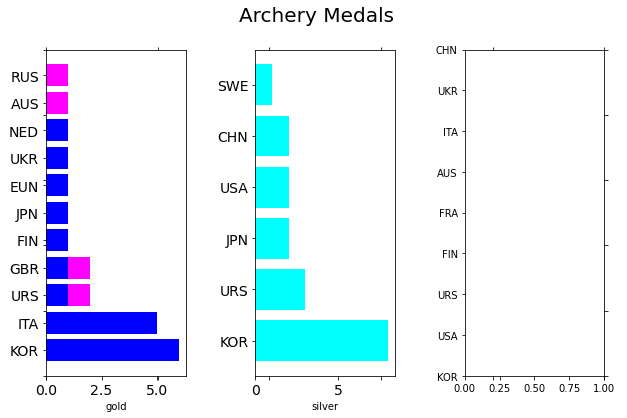

In [6]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

def plotThreeLists (gold, silver, bronze, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (131)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(bronze)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in bronze ])
    ax1 .barh (range(len(bronze)), [ x [1] for x in bronze ], align='center', color='magenta')
    ax1.set_xlabel("bronze")

    ax2 = f .add_subplot (132)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(silver)) 
    pylab .yticks (pos, [ x [0] for x in silver ])
    ax2 .barh (range (len(silver)), [ x [1] for x in silver ], align='center', color='cyan')
    ax2.set_xlabel("silver")
    
    ax3 = f .add_subplot (133)
    pos = np .arange (len(gold)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in gold ])
    ax1 .barh (range(len(gold)), [ x [1] for x in gold ], align='center', color='blue')
    ax1.set_xlabel("gold")
    

goldRS = goldS [ 0:len(goldS) ] [::-1]
silverRS = silverS [ 0:len(silverS) ] [::-1]
bronzeRS = bronzeS [ 0:len(bronzeS) ] [::-1]
plotThreeLists(goldS,silverS,bronzeS, "Archery Medals")